In [148]:
!pip install https://github.com/stefanloock/pyshearlab/archive/master.zip

  Using cached https://github.com/stefanloock/pyshearlab/archive/master.zip
  Preparing metadata (setup.py) ... done


In [149]:
!pip install kymatio

In [150]:
!pip install torchsummary

In [151]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [152]:
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Flatten, Convolution2D, MaxPooling2D,ZeroPadding2D
from keras.layers import Input, Lambda
from keras.utils import to_categorical
from keras.datasets import mnist
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [153]:
from google.colab.patches import cv2_imshow
from PIL import Image
import numpy as np
from scipy import io as sio
import pyshearlab
import imageio
import cv2
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib import gridspec
from kymatio import Scattering2D
import os
from sklearn import metrics as sklearn_metrics
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import sys
from tqdm import tqdm
from tensorflow.keras import layers, models , optimizers , losses ,activations , callbacks, metrics
from tensorflow.keras.layers import Layer
from tensorflow.keras.applications import vgg16
from kymatio.torch import Scattering2D

In [154]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchsummary import summary

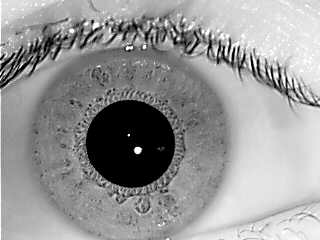

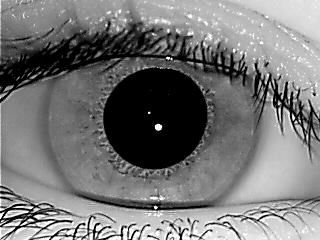

In [155]:
import cv2

img3 = cv2.imread('/content/drive/MyDrive/IITD Database/001/01_L.bmp', 0)						# read input image
img4 = cv2.imread('/content/drive/MyDrive/IITD Database/002/01_L.bmp', 0)						# read input image
cv2_imshow(img3)

# cv2_imshow(out3[:326,70:315])
# cout3 = out3[10:346,120:315]
cv2_imshow(img4)

# cv2_imshow(out4[0:315,60:280])
# cout4 = out4[0:315,60:280]
# cv2.waitKey(0)											# hold the display window

In [108]:
img3.shape

(240, 320)

In [109]:
# Load the original image

X = Image.fromarray(img3)
X = np.array(X.resize((320,320)))
X = X.astype(float)/255.

# Set parameters
sigma = 0
thresholdingFactor = 3

# Specify a list of scales to experiment with
scales_list = [4]

for scales in scales_list:
    # tic()
    print(f"Generating shearlet system with {scales} scales...")

    # Create shearlets
    shearletSystem = pyshearlab.SLgetShearletSystem2D(0, X.shape[0], X.shape[1], scales)
    # toc()

    # tic()
    print("Decomposition, thresholding, and reconstruction...")

    # Add noise to the image
    # Decomposition
    coeffs3 = pyshearlab.SLsheardec2D(X, shearletSystem)

    # Thresholding
    oldCoeffs3 = coeffs3.copy()

Generating shearlet system with 4 scales...


/usr/local/lib/python3.10/dist-packages/pyshearlab/pyShearLab2D.py:157: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  h0, h1 = dfilters('dmaxflat4', 'd')/np.sqrt(2)
/usr/local/lib/python3.10/dist-packages/pyshearlab/pySLUtilities.py:40: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  h0, h1 = dfilters('dmaxflat4', 'd')/np.sqrt(2)
/usr/local/lib/python3.10/dist-packages/pyshearlab/pySLUtilities.py:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different length

Decomposition, thresholding, and reconstruction...


In [110]:
# Load the original image

X = Image.fromarray(img4)
X = np.array(X.resize((320,320)))
X = X.astype(float)/255.

# Set parameters
sigma = 0
thresholdingFactor = 3

# Specify a list of scales to experiment with
scales_list = [4]

for scales in scales_list:
    # tic()
    print(f"Generating shearlet system with {scales} scales...")

    # Create shearlets
    shearletSystem = pyshearlab.SLgetShearletSystem2D(0, X.shape[0], X.shape[1], scales)
    # toc()

    # tic()
    print("Decomposition, thresholding, and reconstruction...")

    # Add noise to the image
    # Decomposition
    coeffs4 = pyshearlab.SLsheardec2D(X, shearletSystem)

    # Thresholding
    oldCoeffs4 = coeffs4.copy()

Generating shearlet system with 4 scales...
Decomposition, thresholding, and reconstruction...


In [111]:
def normalizer(data):
  data = np.array(data)
  normalized_coeff = (data - data.min())*255 / (data.max() - data.min())
  return normalized_coeff - 127

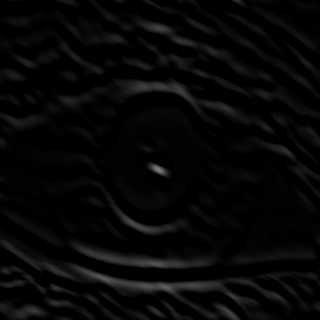

In [112]:
cv2_imshow(normalizer(oldCoeffs4[:,:,30]))

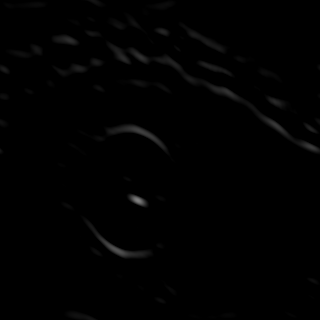

In [113]:
cv2_imshow(normalizer(oldCoeffs3[:,:,30]))

In [114]:
def shearlet_transform(img,scales=2):
    X = Image.fromarray(img)
    X = np.array(X.resize((320,320)))
    X = X.astype(float)/255.
    shearletSystem = pyshearlab.SLgetShearletSystem2D(0, X.shape[0], X.shape[1], scales)
    coeffs = pyshearlab.SLsheardec2D(X, shearletSystem)
    oldCoeffs = coeffs.copy()
    normalized_coeffs = []
    for i in range(oldCoeffs.shape[-1]):
        data = oldCoeffs[:,:,i]
        normalized_coeff = (data - data.min())*255 / (data.max() - data.min())
        normalized_coeff = normalized_coeff.astype(np.int32)
        # normalized_coeff = np.pad(normalized_coeff,1,constant_values = 255)
        normalized_coeffs.append(normalized_coeff)
    return np.array(normalized_coeffs)

In [115]:
normalized_coeffs = shearlet_transform(img3)

In [116]:
normalized_coeffs.shape

(17, 320, 320)

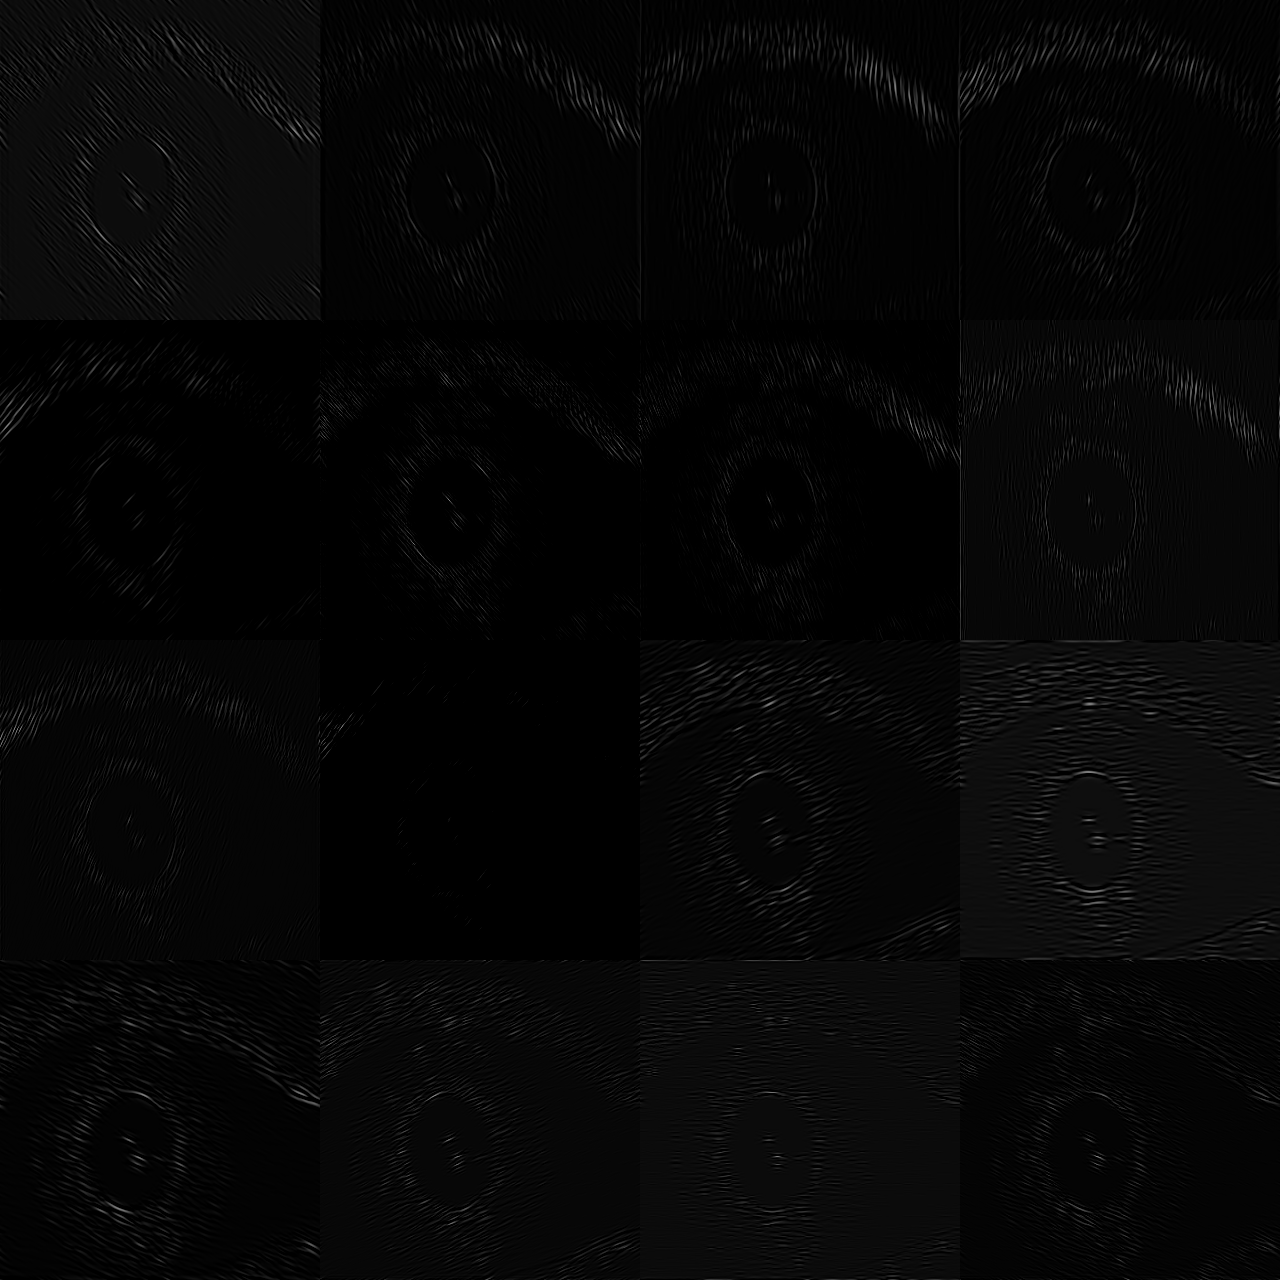

In [117]:
grid_image = cv2.vconcat([cv2.hconcat(normalized_coeffs[i:i+4]-127) for i in range(0, 16, 4)])

# Display the grid image
cv2_imshow(grid_image)

# Wait for a key press
cv2.waitKey(0)

# Destroy all windows
cv2.destroyAllWindows()

In [118]:
cosine_similarity = np.dot(np.reshape(oldCoeffs4[:,:,:-1],[-1]), np.reshape(oldCoeffs3[:,:,:-1],[-1])) / (np.linalg.norm(np.reshape(oldCoeffs4[:,:,:-1],[-1])) * np.linalg.norm(np.reshape(oldCoeffs3[:,:,:-1],[-1])))
print("Cosine Similarity:", cosine_similarity)

Cosine Similarity: 0.05097787213728035


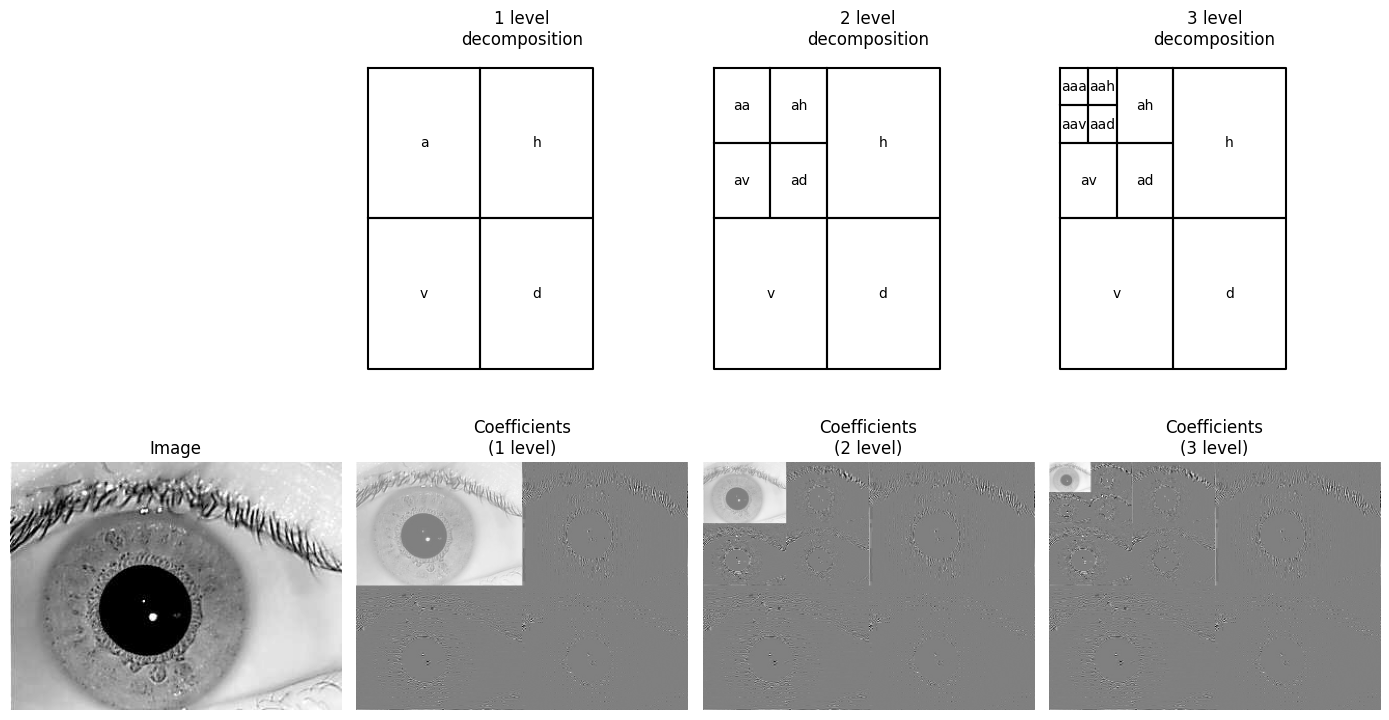

In [119]:
import numpy as np
import pywt
from matplotlib import pyplot as plt
from pywt._doc_utils import wavedec2_keys, draw_2d_wp_basis

x1 = cv2.imread("/content/drive/MyDrive/IITD Database/001/01_L.bmp", 0)
# x1 = fingerprint_enhancer.enhance_Fingerprint(x1)
# x1 = cv2.resize(x1, (320, 320))
shape = x1.shape

max_lev = 3       # how many levels of decomposition to draw
label_levels = 3  # how many levels to explicitly label on the plots

fig, axes = plt.subplots(2, 4, figsize=[14, 8])
for level in range(0, max_lev + 1):
    if level == 0:
        # show the original image before decomposition
        axes[0, 0].set_axis_off()
        axes[1, 0].imshow(x1, cmap=plt.cm.gray)
        axes[1, 0].set_title('Image')
        axes[1, 0].set_axis_off()
        continue

    # plot subband boundaries of a standard DWT basis
    draw_2d_wp_basis(shape, wavedec2_keys(level), ax=axes[0, level],
                     label_levels=label_levels)
    axes[0, level].set_title('{} level\ndecomposition'.format(level))

    # compute the 2D DWT
    c1 = pywt.wavedec2(x1, 'bior4.4', mode='periodization', level=level)
    # normalize each coefficient array independently for better visibility
    c1[0] /= np.abs(c1[0]).max()
    for detail_level in range(level):
        c1[detail_level + 1] = [d/np.abs(d).max() for d in c1[detail_level + 1]]
    # show the normalized coefficients
    arr, slices = pywt.coeffs_to_array(c1)
    axes[1, level].imshow(arr, cmap=plt.cm.gray)
    axes[1, level].set_title('Coefficients\n({} level)'.format(level))
    axes[1, level].set_axis_off()

plt.tight_layout()
plt.show()

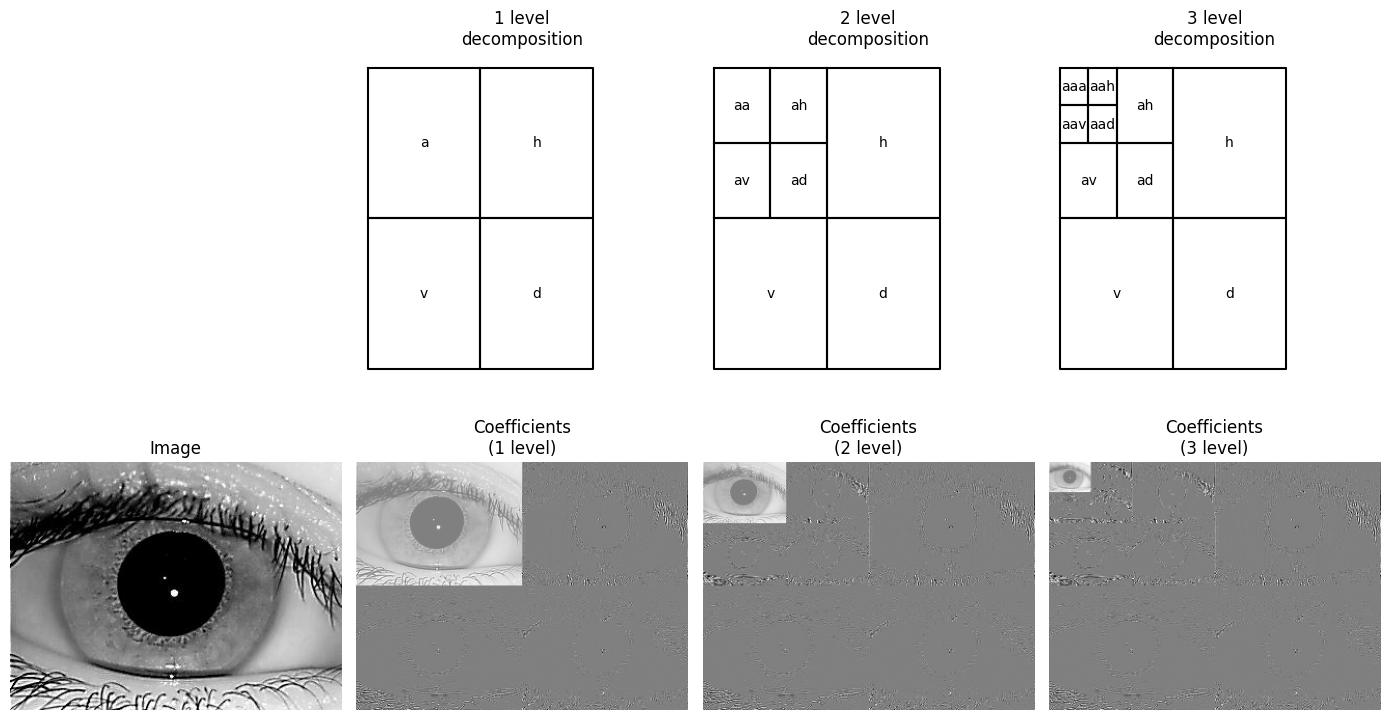

In [120]:
import numpy as np
import pywt
from matplotlib import pyplot as plt
from pywt._doc_utils import wavedec2_keys, draw_2d_wp_basis

x2 = cv2.imread("/content/drive/MyDrive/IITD Database/002/01_L.bmp", 0)
# x2 = fingerprint_enhancer.enhance_Fingerprint(x2)
# x2 = cv2.resize(x2, (320, 320))
shape = x2.shape

max_lev = 3       # how many levels of decomposition to draw
label_levels = 3  # how many levels to explicitly label on the plots

fig, axes = plt.subplots(2, 4, figsize=[14, 8])
for level in range(0, max_lev + 1):
    if level == 0:
        # show the original image before decomposition
        axes[0, 0].set_axis_off()
        axes[1, 0].imshow(x2, cmap=plt.cm.gray)
        axes[1, 0].set_title('Image')
        axes[1, 0].set_axis_off()
        continue

    # plot subband boundaries of a standard DWT basis
    draw_2d_wp_basis(shape, wavedec2_keys(level), ax=axes[0, level],
                     label_levels=label_levels)
    axes[0, level].set_title('{} level\ndecomposition'.format(level))

    # compute the 2D DWT
    c2 = pywt.wavedec2(x2, 'bior4.4', mode='periodization', level=level)
    # normalize each coefficient array independently for better visibility
    c2[0] /= np.abs(c2[0]).max()
    for detail_level in range(level):
        c2[detail_level + 1] = [d/np.abs(d).max() for d in c2[detail_level + 1]]
    # show the normalized coefficients
    arr, slices = pywt.coeffs_to_array(c2)
    axes[1, level].imshow(arr, cmap=plt.cm.gray)
    axes[1, level].set_title('Coefficients\n({} level)'.format(level))
    axes[1, level].set_axis_off()

plt.tight_layout()
plt.show()

In [121]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Reshape matrices to vectors
vector1 = c1[0].flatten()
vector2 = c2[0].flatten()

# Calculate cosine similarity
similarity = cosine_similarity([vector1], [vector2])[0, 0]

print(f"Cosine Similarity: {similarity}")

Cosine Similarity: 0.9413249524938374


In [122]:
from kymatio.torch import Scattering2D
import torch
import random

In [123]:
import os
import random
import numpy as np
import cv2

class IrisTripletGenerator:
    def __init__(self, datasetPath):
        self.personDict = self.generate_person_dictionary(datasetPath)

    def generate_person_dictionary(self, datasetPath):
        personDict = {}
        for person_folder in os.listdir(datasetPath):
            person_name = person_folder
            person_path = os.path.join(datasetPath, person_folder)
            if os.path.isdir(person_path):
                # print(person_path)
                person_images = os.listdir(person_path)
                # print(person_images)
                personDict[person_folder] = person_images
        return personDict

    def get_next_element_for_person(self, person_name):
        anchorPhoto = random.choice(self.personDict[person_name])
        # Make sure the anchor image is not selected as positive
        positivePhoto = random.choice(self.personDict[person_name])
        while positivePhoto == anchorPhoto:
            positivePhoto = random.choice(self.personDict[person_name])

        # Select a different person for the negative sample
        negativePerson = random.choice(list(self.personDict.keys()))
        while negativePerson == person_name:
            negativePerson = random.choice(list(self.personDict.keys()))

        # Select a random image from the negative person
        negativePhoto = random.choice(self.personDict[negativePerson])

        # Read images
        anchor_img = cv2.imread(os.path.join(datasetPath, person_name, anchorPhoto), 0)
        positive_img = cv2.imread(os.path.join(datasetPath, person_name, positivePhoto), 0)
        negative_img = cv2.imread(os.path.join(datasetPath, negativePerson, negativePhoto), 0)

        return anchor_img, positive_img, negative_img

# Example usage
datasetPath = "/content/drive/MyDrive/IITD Database"
iris_generator = IrisTripletGenerator(datasetPath)

In [124]:
#Choose a specific number of keys to use for training data
num_keys_for_training = 200 # You can set this to your desired number
training_data = []

selected_keys = random.sample(list(iris_generator.personDict.keys()), num_keys_for_training)
anchor_images = []
positive_images = []
negative_images = []
for person in selected_keys:
    anchor_img, positive_img, negative_img = iris_generator.get_next_element_for_person(person)
    # Assuming shearlet_transform is a function you have defined for your preprocessing
    # Assuming anchor_images[0] is the image data
    anchor_images.append(anchor_img)
    positive_images.append(positive_img)
    negative_images.append(negative_img)
    # training_data.append([shearlet_transform(anchor_img), shearlet_transform(positive_img), shearlet_transform(negative_img)])

In [125]:
save_path = '/content/drive/MyDrive/iris_training_data.npz'
np.savez(save_path, anchor=anchor_images, positive=positive_images, negative=negative_images)

In [126]:
save_path = '/content/drive/MyDrive/iris_training_data.npz'
loaded_data = np.load(save_path)
loaded_anchor_images = loaded_data['anchor']
loaded_positive_images = loaded_data['positive']
loaded_negative_images = loaded_data['negative']

Exception ignored in: <function NpzFile.__del__ at 0x79033bf6a7a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/numpy/lib/npyio.py", line 223, in __del__
  File "/usr/local/lib/python3.10/dist-packages/numpy/lib/npyio.py", line 218, in close
OSError: [Errno 107] Transport endpoint is not connected


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader,random_split

class TripletDataset(Dataset):
    def __init__(self, anchor_images, positive_images, negative_images,shape = (320,320), transform=None):
        self.anchor_images = anchor_images
        self.positive_images = positive_images
        self.negative_images = negative_images
        self.transform = transform

    def __len__(self):
        return len(self.anchor_images)

    def __getitem__(self, idx):
        anchor = self.anchor_images[idx]
        positive = self.positive_images[idx]
        negative = self.negative_images[idx]

        # Apply transformations if provided
        if self.transform:
            anchor = self.transform(anchor)
            positive = self.transform(positive)
            negative = self.transform(negative)

        return anchor, positive, negative

# Assuming loaded_anchor_images, loaded_positive_images, loaded_negative_images are lists of image data
# Make sure each list has the same length

# # Create a TripletDataset
# transform = transforms.Compose([transforms.ToTensor()])  # Add your custom transformations
# triplet_dataset = TripletDataset(loaded_anchor_images, loaded_positive_images, loaded_negative_images, transform)

In [156]:
loaded_anchor_images = np.resize(loaded_anchor_images,(200,1,240,320))
loaded_positive_images = np.resize(loaded_positive_images,(200,1,240,320))
loaded_negative_images = np.resize(loaded_negative_images,(200,1,240,320))

In [157]:
import numpy as np
import torch

In [158]:
scattering = Scattering2D(J = 4,L = 8,max_order = 1,shape=(240, 320))

In [159]:
anchor_scattering = scattering(torch.from_numpy(loaded_anchor_images/255.0).float())
positive_scattering = scattering(torch.from_numpy(loaded_positive_images/255.0).float())
negative_scattering = scattering(torch.from_numpy(loaded_negative_images/255.0).float())

In [160]:
import torch

In [161]:
scattering = Scattering2D(J = 4,L = 8,max_order = 1,shape=(240, 320))

In [162]:
x1.shape

(240, 320)

In [163]:
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
from kymatio import Scattering2D
from PIL import Image
import os


####################################################################
# Scattering computations
#-------------------------------------------------------------------
# First, we read the input digit:
# src_img = Image.fromarray(out).resize((328, 328))
# src_img = np.array(src_img)
# print("img shape: ", src_img.shape)

####################################################################
# We compute a Scattering Transform with $L=6$ angles and $J=3$ scales.
#
# Morlet wavelets $\psi_{\theta}$ are Hermitian, i.e: $\psi_{\theta}^*(u) = \psi_{\theta}(-u) = \psi_{\theta+\pi}(u)$.
#
# As a consequence, the modulus wavelet transform of a real signal $x$ computed with a Morlet wavelet $\psi_{\theta}$
# is invariant by a rotation of $\pi$ of the wavelet. Indeed, since $(x*\psi_{\theta}(u))^* = x*(\psi_{\theta}^*)(u) =
# x*\psi_{\theta+\pi}(u)$, we have $\lvert x*\psi_{\theta}(u)\rvert = \lvert x*\psi_{\theta+\pi}(u)\rvert$.
#
# Scattering coefficients of order $n$:
# $\lvert \lvert \lvert x * \psi_{\theta_1, j_1} \rvert * \psi_{\theta_2, j_2} \rvert \cdots * \psi_{\theta_n, j_n}
# \rvert * \phi_J$ are thus invariant to a rotation of $\pi$ of any wavelet $\psi_{\theta_i, j_i}$. As a consequence,
# Kymatio computes scattering coefficients with $L$ wavelets whose orientation is uniformly sampled in
# an interval of length $\pi$.

L = 9
J = 3
# scattering = Scattering2D(J=J, shape=src_img.shape, L=L, max_order=2, frontend='numpy')


####################################################################
# We now compute the scattering coefficients:
# src_img_tensor = src_img.astype(np.float32) / 255.
x1 = cv2.imread("/content/drive/MyDrive/IITD Database/001/01_L.bmp", 0)
scat_coeffs = scattering(torch.from_numpy(x1).float())
scat_coeffs_orig = scat_coeffs
print("coeffs shape: ", scat_coeffs.shape)
# Invert colors
scat_coeffs= -scat_coeffs

coeffs shape:  torch.Size([33, 15, 20])


In [164]:
normalized_coeffs = []
for i in range(scat_coeffs.shape[0]):
  data = -scat_coeffs[i,:,:]
  normalized_coeff = (data - data.min())*255 / (data.max() - data.min())
  normalized_coeffs.append(normalized_coeff)

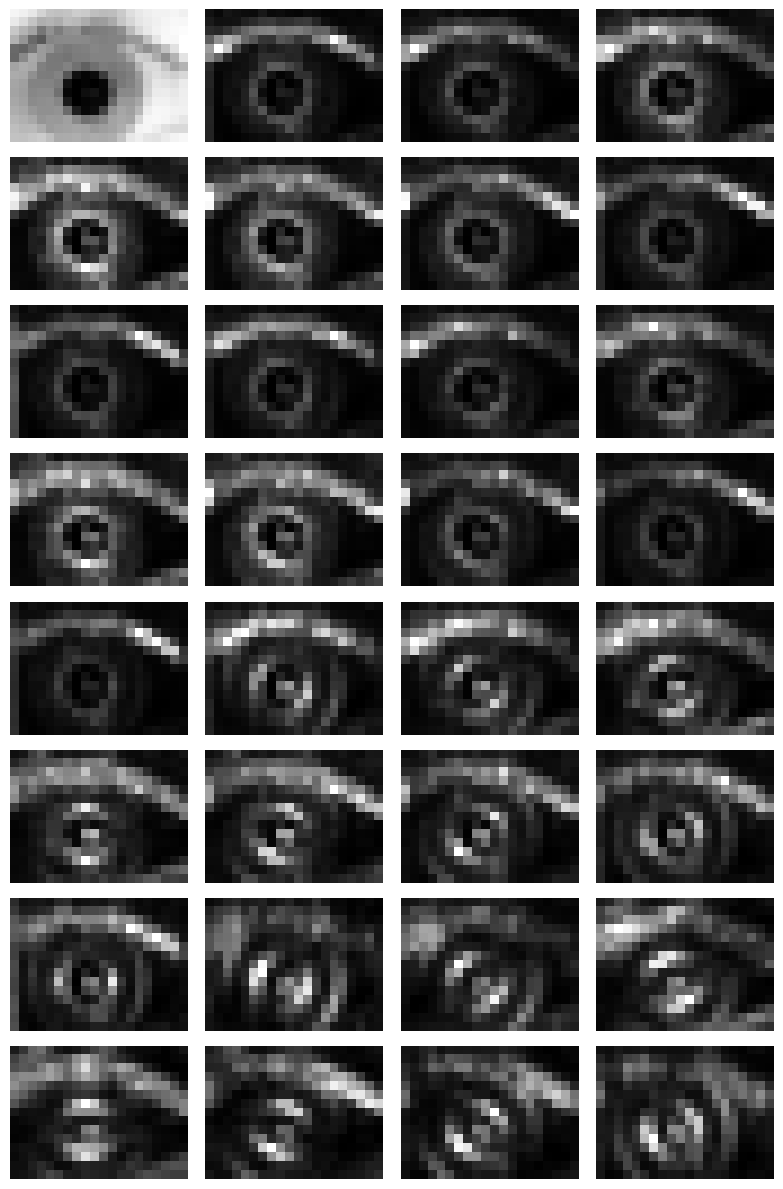

In [165]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 8x4 grid of subplots
fig, axes = plt.subplots(8, 4, figsize=(8, 12))

# Plot the data in each subplot
for i in range(8):
    for j in range(4):
        index = i * 4 + j
        axes[i, j].imshow(normalized_coeffs[index], cmap='gray')
        axes[i, j].axis('off')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

In [166]:
normalized_coeffs = []
for i in range(scat_coeffs.shape[0]):
  data = -scat_coeffs[i,:,:]
  normalized_coeff = (data - data.min())*255 / (data.max() - data.min())
  normalized_coeffs.append(normalized_coeff)

In [167]:
shape = anchor_scattering.shape
anchor_scattering = np.reshape(anchor_scattering,(shape[0],shape[1]*shape[2],shape[3],shape[4]))
positive_scattering = np.reshape(positive_scattering,(shape[0],shape[1]*shape[2],shape[3],shape[4]))
negative_scattering = np.reshape(negative_scattering,(shape[0],shape[1]*shape[2],shape[3],shape[4]))

In [168]:
anchor_scattering.shape

torch.Size([200, 33, 15, 20])

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class EmbeddingModel(nn.Module):
    def __init__(self):
        super(EmbeddingModel, self).__init__()
        self.bn1 = nn.BatchNorm2d(32)
        self.conv1 = nn.Conv2d(32, 64, kernel_size=3, stride=1)# 13,18
        self.bn2 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, stride=1)# 11,16
        self.bn3 = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)# 13,18
        self.fc1 = nn.Linear(64 * 5 * 8, 1028)
        self.fc2 = nn.Linear(1028, 512)

    def forward(self, x):
        x = F.relu(self.bn2(self.conv1(self.bn1(x))))
        x = F.relu(self.bn3(self.conv2(x)))
        x = self.pool(x)
        # x = self.bn1(x)
        x = x.view(-1, 64 * 5 * 8)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return x

class TripletNet(nn.Module):
    def __init__(self, embedding_model):
        super(TripletNet, self).__init__()
        self.embedding_model = embedding_model

    def forward(self, anchor, positive, negative):
        output_anchor = self.embedding_model(anchor)
        output_positive = self.embedding_model(positive)
        output_negative = self.embedding_model(negative)
        return output_anchor, output_positive, output_negative

# Example usage:
imsize = 40
embedding_model = EmbeddingModel()
triplet_net = TripletNet(embedding_model)
optimizer = optim.Adam(triplet_net.parameters(), lr=0.0001)

In [ ]:
hwidth = 15
wwidth = 20
# Print the summary
result = summary(triplet_net, [(32, hwidth, wwidth), (32, hwidth, wwidth), (32, hwidth, wwidth)])

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
       BatchNorm2d-1           [-1, 32, 15, 20]              64
            Conv2d-2           [-1, 64, 13, 18]          18,496
       BatchNorm2d-3           [-1, 64, 13, 18]             128
            Conv2d-4           [-1, 64, 11, 16]          36,928
       BatchNorm2d-5           [-1, 64, 11, 16]             128
         MaxPool2d-6             [-1, 64, 5, 8]               0
            Linear-7                 [-1, 1028]       2,632,708
            Linear-8                  [-1, 512]         526,848
    EmbeddingModel-9                  [-1, 512]               0
      BatchNorm2d-10           [-1, 32, 15, 20]              64
           Conv2d-11           [-1, 64, 13, 18]          18,496
      BatchNorm2d-12           [-1, 64, 13, 18]             128
           Conv2d-13           [-1, 64, 11, 16]          36,928
      BatchNorm2d-14           [-1, 64,

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])  # Add your custom transformations
triplet_dataset = TripletDataset(anchor_scattering[:,1:,:,:], positive_scattering[:,1:,:,:], negative_scattering[:,1:,:,:], transform)
train_size = int(0.7 * 200)
val_size = int(0.15 * 200)
test_size = len(triplet_dataset) - train_size - val_size

# Use random_split to split the dataset into training, validation, and test sets
train_dataset, val_dataset, test_dataset = random_split(triplet_dataset, [train_size, val_size, test_size])

# Define data loaders for training, validation, and testing
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=8, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=8, shuffle=False)
# Now you can use this dataloader in your training loop

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

# Assuming you have a function to calculate accuracy
def calculate_accuracy(output_anchor, output_positive, output_negative):
    pos_dist = (output_anchor - output_positive).pow(2).sum(1)
    neg_dist = (output_anchor - output_negative).pow(2).sum(1)

    # If positive distance is smaller than negative distance, it's a correct match
    correct_matches = (pos_dist < neg_dist).float().sum()

    # Calculate accuracy as the ratio of correct matches to the total number of samples
    accuracy = correct_matches / len(output_anchor)

    return accuracy.item()

num_epochs = 15
train_accuracies = []
val_accuracies = []
train_losses = []
triplet_net.train()

# Assuming you have train_dataloader and val_dataloader for training and validation
for epoch in range(num_epochs):
    total_loss = 0.0
    total_accuracy = 0.0

    # Training phase
    triplet_net.train()
    for batch in train_dataloader:
        anchor, positive, negative = batch
        optimizer.zero_grad()
        output_anchor, output_positive, output_negative = triplet_net(anchor, positive, negative)

        # Assuming you have a triplet loss implementation
        margin = 1.0
        triplet_margin_loss = nn.TripletMarginLoss(margin=margin)

        # Calculate the loss
        loss = triplet_margin_loss(output_anchor, output_positive, output_negative)
        loss.backward()
        optimizer.step()

        # Calculate accuracy
        accuracy = calculate_accuracy(output_anchor, output_positive, output_negative)
        total_accuracy += accuracy
        total_loss += loss.item()

    average_loss = total_loss / len(train_dataloader)
    average_accuracy = total_accuracy / len(train_dataloader)
    train_accuracies.append(average_accuracy)
    train_losses.append(average_loss)

    # Validation phase
    triplet_net.eval()
    total_val_accuracy = 0.0
    with torch.no_grad():
        for val_batch in val_dataloader:
            val_anchor, val_positive, val_negative = val_batch
            val_output_anchor, val_output_positive, val_output_negative = triplet_net(val_anchor, val_positive, val_negative)

            # Calculate validation accuracy
            val_accuracy = calculate_accuracy(val_output_anchor, val_output_positive, val_output_negative)
            total_val_accuracy += val_accuracy

    average_val_accuracy = total_val_accuracy / len(val_dataloader)
    val_accuracies.append(average_val_accuracy)


    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {average_loss}, Accuracy: {average_accuracy}, Val Accuracy: {average_val_accuracy}')


Epoch 1/15, Loss: 0.7905606230099996, Accuracy: 0.6805555555555556, Val Accuracy: 0.8333333283662796
Epoch 2/15, Loss: 0.5051522586080763, Accuracy: 0.7708333333333334, Val Accuracy: 0.8958333283662796
Epoch 3/15, Loss: 0.43586642212337917, Accuracy: 0.7916666666666666, Val Accuracy: 0.8958333283662796
Epoch 4/15, Loss: 0.2580890721744961, Accuracy: 0.9097222222222222, Val Accuracy: 0.8958333283662796
Epoch 5/15, Loss: 0.1816708180639479, Accuracy: 0.9444444444444444, Val Accuracy: 0.9375
Epoch 6/15, Loss: 0.2140650881661309, Accuracy: 0.9097222222222222, Val Accuracy: 0.9375
Epoch 7/15, Loss: 0.20011699199676514, Accuracy: 0.9305555555555556, Val Accuracy: 0.90625
Epoch 8/15, Loss: 0.13267442915174696, Accuracy: 0.9583333333333334, Val Accuracy: 0.9375
Epoch 9/15, Loss: 0.10702777571148342, Accuracy: 0.9791666666666666, Val Accuracy: 0.9375
Epoch 10/15, Loss: 0.09026022089852227, Accuracy: 0.9791666666666666, Val Accuracy: 0.9375
Epoch 11/15, Loss: 0.02714661094877455, Accuracy: 0.993

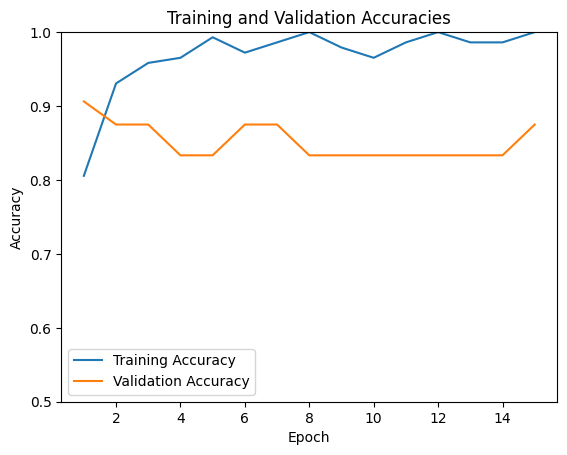

In [ ]:
# Plotting the training and validation accuracies
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0.5,1)
plt.title('Training and Validation Accuracies')
plt.legend()
plt.show()

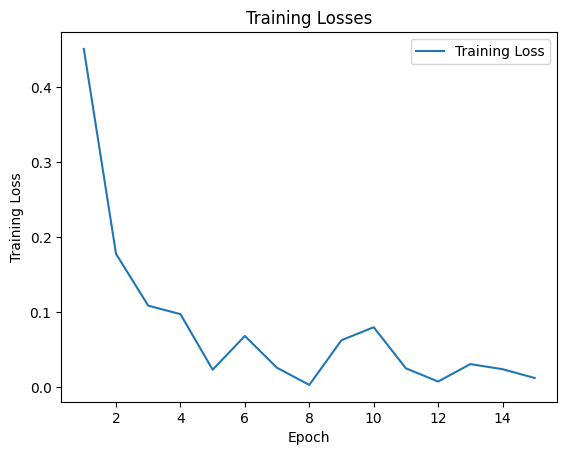

In [ ]:
# Plotting the training and validation accuracies
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
# plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Losses')
plt.legend()
plt.show()

In [ ]:
import torch
from torch.utils.data import DataLoader

# Assuming you have a test_dataloader for testing
# Modify this based on your actual dataset and model

# Set the model to evaluation mode
triplet_net.eval()

# Lists to store anchor, positive, and negative distances
all_positive_distances = []
all_negative_distances = []
predictions = []

# Iterate over the test dataset
with torch.no_grad():
    for test_batch in test_dataloader:
        test_anchor, test_positive, test_negative = test_batch

        # Get embeddings from the model
        anchor_embedding = embedding_model(test_anchor)
        positive_embedding = embedding_model(test_positive)
        negative_embedding = embedding_model(test_negative)

        # Calculate distances
        positive_distance = torch.sum((anchor_embedding - positive_embedding).pow(2), dim=1)
        negative_distance = torch.sum((anchor_embedding - negative_embedding).pow(2), dim=1)

        # Append distances to the lists
        predictions.append((positive_distance < negative_distance))
        all_positive_distances.extend(positive_distance.cpu().numpy())
        all_negative_distances.extend(negative_distance.cpu().numpy())

# Convert lists to PyTorch tensors
all_positive_distances = torch.tensor(all_positive_distances)
all_negative_distances = torch.tensor(all_negative_distances)

# Calculate accuracy based on distances
# print(all_positive_distances)
# print(all_negative_distances)
correct_matches = (all_positive_distances < all_negative_distances).sum().item()
total_samples = len(all_positive_distances)
accuracy = correct_matches / total_samples

print(f'Test Accuracy: {accuracy*100 :.5f}%')

Test Accuracy: 100.00000%


In [ ]:
# cv2_imshow(np.array(loaded_anchor_images[0]).reshape(240,320))
# cv2_imshow(np.array(loaded_positive_images[0].reshape(240,320)))
# cv2_imshow(np.array(loaded_negative_images[0].reshape(240,320)))
# anchor_embedding = embedding_model(anchor_scattering[:,1:,:,:])
# positive_embedding = embedding_model(positive_scattering[:,1:,:,:])
# negative_embedding = embedding_model(negative_scattering[:,1:,:,:])
# positive_distance = torch.sum((anchor_embedding - positive_embedding).pow(2), dim=1)
# negative_distance = torch.sum((anchor_embedding - negative_embedding).pow(2), dim=1)

In [ ]:
img2 = np.array(loaded_anchor_images[0].reshape(240,320))
img1 = np.array(loaded_positive_images[0].reshape(240,320))
img3 = np.array(loaded_negative_images[0].reshape(240,320))
stacked_img = np.hstack((img1, img2, img3))

# # Display the stacked image
# plt.imshow(stacked_img)
# plt.axis('off')
# plt.show()
# print(positive_distance[0])
# print(negative_distance[0])

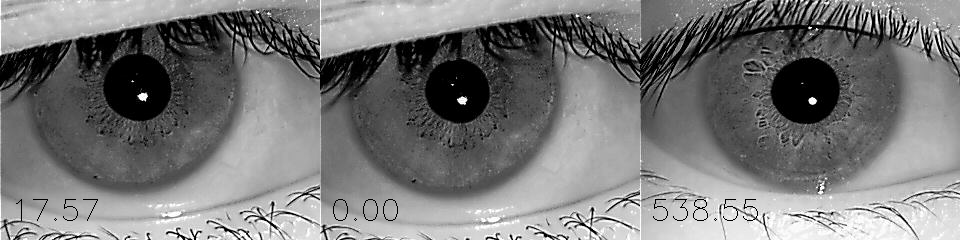

In [ ]:
import cv2

# Ensure all images have the same height
height = min(img1.shape[0], img2.shape[0], img3.shape[0])

# Resize images to have the same height
img1 = cv2.resize(img1, (int(img1.shape[1] * height / img1.shape[0]), height))
img2 = cv2.resize(img2, (int(img2.shape[1] * height / img2.shape[0]), height))
img3 = cv2.resize(img3, (int(img3.shape[1] * height / img3.shape[0]), height))

# Stack images horizontally
stacked_img = np.hstack((img1, img2, img3))

# Add labels to the stacked image
label1 = f'{positive_distance[0]:.2f}'
label2 = f'0.00'  # Assuming anchor distance is always 0
label3 = f'{negative_distance[0]:.2f}'

font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
font_thickness = 1
font_color = (0, 0, 255)  # White color

cv2.putText(stacked_img, label1, (10, height - 20), font, font_scale, font_color, font_thickness)
cv2.putText(stacked_img, label2, (img1.shape[1] + 10, height - 20), font, font_scale, font_color, font_thickness)
cv2.putText(stacked_img, label3, (img1.shape[1] + img2.shape[1] + 10, height - 20), font, font_scale, font_color, font_thickness)

# Display the stacked and labeled image
cv2_imshow(stacked_img)